In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/data/IMDB Dataset.csv"

'/content/drive/My Drive/Colab Notebooks/data/IMDB Dataset.csv'


**iMPORT MODUL YANG DIGUNAKAN**

In [ ]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
import csv

**MEMANGGIL DATA YANG DIGUNAKAN**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/IMDB Dataset.csv')

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
import nltk
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PREPROCESSING DAN ENCODE SENTIMENT**

In [ ]:
def load_dataset():
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


**MEMBAGI DATA TRAIN DAN DATA TEST**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
42897    [having, read, book, prior, watching, adaptati...
16780    [a, long, film, important, character, south, a...
44069    [working, movie, theater, projectionist, i, op...
21589    [i, saw, ages, ago, i, younger, could, never, ...
22630    [this, film, perfect, example, take, fascinati...
                               ...                        
11186    [the, positive, reviews, page, planted, filmma...
37810    [looking, back, jim, henson, works, years, dea...
27582    [i, think, much, action, end, don, think, ther...
21498    [boring, appallingly, acted, summer, pheonix, ...
39973    [i, surprised, many, people, give, move, less,...
Name: review, Length: 40000, dtype: object 

21841    [i, found, movie, charming, i, thought, charac...
18401    [excellent, performance, mary, kay, place, ste...
12870    [an, epic, story, hope, constrained, budget, l...
39218    [definitely, good, idea, screenplay, ok, could...
21692    [i, never, found, charley, chase, funny, even,...
 

In [ ]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

**ENCODE REVIEW**

In [ ]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[ 1549   241   179 ...     0     0     0]
 [   39   101     4 ...    89  5896   998]
 [  672     3   669 ...     0     0     0]
 ...
 [    1    31    17 ...     0     0     0]
 [  259 11577   804 ...     0     0     0]
 [    1   661    38 ...     0     0     0]] 

Encoded X Test
 [[    1   161     3 ...     0     0     0]
 [  224   149  1098 ...     0     0     0]
 [  675  1539    13 ...  1020    84    42]
 ...
 [    1    42  2563 ...  5156  9576   271]
 [    5 12237  1648 ...     0     0     0]
 [    1   922     1 ...     0     0     0]] 

Maximum review length:  130


**MEMBANGUN ARSITEKTUR MODEL**

In [ ]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 32)           2962496   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,987,393
Trainable params: 2,987,393
Non-trainable params: 0
_________________________________________________________________
None


**TRAINING MODEL**

In [ ]:
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Epoch 1/10
1000/1000 - 84s - loss: 0.6757 - accuracy: 0.5653 - val_loss: 0.6633 - val_accuracy: 0.5650
Epoch 2/10
1000/1000 - 84s - loss: 0.4077 - accuracy: 0.8245 - val_loss: 0.3409 - val_accuracy: 0.8566
Epoch 3/10
1000/1000 - 83s - loss: 0.2157 - accuracy: 0.9248 - val_loss: 0.3227 - val_accuracy: 0.8717
Epoch 4/10
1000/1000 - 83s - loss: 0.1291 - accuracy: 0.9610 - val_loss: 0.3762 - val_accuracy: 0.8709
Epoch 5/10
1000/1000 - 83s - loss: 0.0877 - accuracy: 0.9757 - val_loss: 0.4727 - val_accuracy: 0.8673
Epoch 6/10
1000/1000 - 84s - loss: 0.0664 - accuracy: 0.9825 - val_loss: 0.5783 - val_accuracy: 0.8510
Epoch 7/10
1000/1000 - 84s - loss: 0.0673 - accuracy: 0.9822 - val_loss: 0.6769 - val_accuracy: 0.8221
Epoch 8/10
1000/1000 - 84s - loss: 0.0619 - accuracy: 0.9852 - val_loss: 0.4834 - val_accuracy: 0.8609
Epoch 9/10
1000/1000 - 83s - loss: 0.0402 - accuracy: 0.9906 - val_loss: 0.7304 - val_accuracy: 0.8493
Epoch 10/10
1000/1000 - 83s - loss: 0.0664 - accuracy: 0.9822 - val_loss:

**MEMBUAT GRAFIK DARI HASIL TRAINING**

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

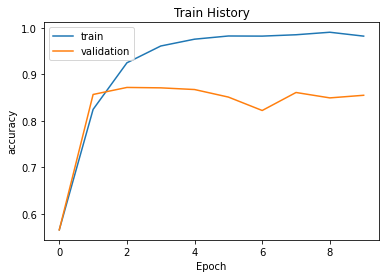

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

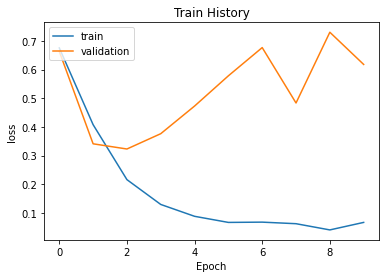

In [ ]:
show_train_history(train_history,'loss','val_loss')

**HASIL AKURASI DATA TEST**

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.6175 - accuracy: 0.8553


0.8553000092506409

**PREDIKSI DATA TEST & CONFUSION MATRIX**

Correct Prediction: 8553
Wrong Prediction: 1447
Accuracy: 85.53
0.8553
              precision    recall  f1-score   support

         pos       0.86      0.84      0.85      4926
         neg       0.85      0.87      0.86      5074

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4149  777]
 [ 670 4404]]


Text(0.5, 1.0, 'Confusion Matrix Review Movie From IMdb')

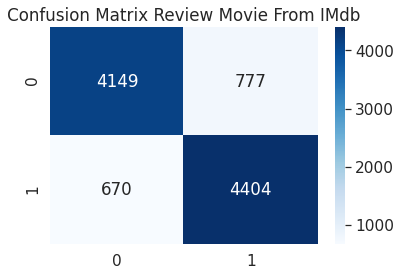

In [ ]:
y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

import seaborn as sn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
print(metrics.accuracy_score(y_test, y_pred))
target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,cmap="Blues", annot=True, fmt='d')
plt.title('Confusion Matrix Review Movie From IMdb')

In [ ]:
data['review'].value_counts()

Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                                

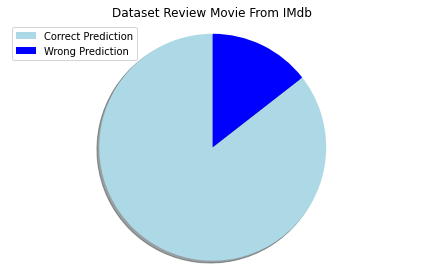

In [ ]:
import matplotlib.pyplot as plt
plt.title('Dataset Review Movie From IMdb')
labels = ['Correct Prediction', 'Wrong Prediction']
sizes = [8553,1447]
colors = ['lightblue', 'blue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

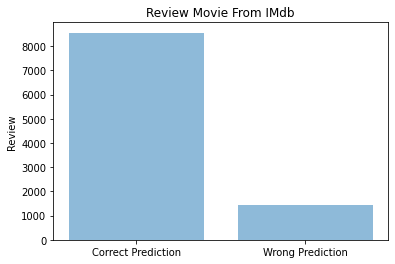

In [ ]:
import numpy as np
objects = ['Correct Prediction', 'Wrong Prediction']
y_pos = np.arange(len(objects))
performance = [8553,1447]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Review')
plt.title('Review Movie From IMdb')

plt.show()